# Paper

In [5]:
library(igraph)
library(numbers)
library(SuperExactTest)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: grid

Attaching package: ‘SuperExactTest’

The following object is masked from ‘package:igraph’:

    union

The following objects are masked from ‘package:base’:

    intersect, union



In [3]:
load(url("https://ndownloader.figshare.com/files/23552735"))

In [3]:
for (i in 1: length(networks)){print(networks[i]); print(graph.list[[i]])}

[1] "Homo_skull"
IGRAPH 1f38b7c UN-- 21 64 -- 
+ attr: name (v/c)
+ edges from 1f38b7c (vertex names):
 [1] Occipital     --Parietal.Left   Occipital     --Parietal.Right 
 [3] Occipital     --Temporal.Left   Occipital     --Temporal.Right 
 [5] Occipital     --Sphenoidal      Parietal.Left --Parietal.Right 
 [7] Parietal.Left --Temporal.Left   Parietal.Left --Sphenoidal     
 [9] Parietal.Left --Frontal         Parietal.Right--Temporal.Right 
[11] Parietal.Right--Sphenoidal      Parietal.Right--Frontal        
[13] Temporal.Left --Sphenoidal      Temporal.Left --Zygomatic.Left 
[15] Temporal.Right--Sphenoidal      Temporal.Right--Zygomatic.Right
+ ... omitted several edges
[1] "Homo_skull_variation"
IGRAPH 1f38deb UN-- 22 66 -- 
+ attr: name (v/c)
+ edges from 1f38deb (vertex names):
 [1] Wormian       --Occipital       Wormian       --Parietal.Left  
 [3] Occipital     --Parietal.Left   Occipital     --Parietal.Right 
 [5] Occipital     --Temporal.Left   Occipital     --Temporal.Righ

In [105]:
# find node-based modules
g<-graph.list[[1]]
mod<-list()
for (i in 1:vcount(g)){
    m<-cluster_spinglass(g, vertex=i)
    mod[[i]]<-V(g)$name[m$community]
}
names(mod)<-V(g)$name

# filter out redundancies
clean_mod<-mod
for (i in 1:(length(clean_mod)-1)){
    j<-i+1
    while (j<=length(clean_mod)){
        if (setequal(clean_mod[[i]], clean_mod[[j]])==TRUE){clean_mod[[j]]<-NA} # if i == j
        if (all(is.element(clean_mod[[i]], clean_mod[[j]]))==TRUE) {clean_mod[[i]]<-NA}  # if i belongs j
        if (all(is.element(clean_mod[[j]], clean_mod[[i]]))==TRUE) {clean_mod[[j]]<-NA} # if j belongs i
        j<-j+1
    }
}

clean_mod<-clean_mod[!is.na(clean_mod)]
print(clean_mod)

$Occipital
[1] "Occipital"       "Parietal.Left"   "Parietal.Right"  "Temporal.Left"  
[5] "Temporal.Right"  "Sphenoidal"      "Zygomatic.Right" "Zygomatic.Left" 
[9] "Frontal"        

$Sphenoidal
 [1] "Sphenoidal"      "Occipital"       "Parietal.Left"   "Parietal.Right" 
 [5] "Temporal.Left"   "Temporal.Right"  "Zygomatic.Left"  "Zygomatic.Right"
 [9] "Palatine.Left"   "Palatine.Right"  "Vomer"          

$Frontal
 [1] "Frontal"            "Ethmoidal"          "Nasal.Left"        
 [4] "Nasal.Right"        "Maxilla.Left"       "Maxilla.Right"     
 [7] "Lacrimal.Left"      "Lacrimal.Right"     "Nasal.Concha.Right"
[10] "Nasal.Concha.Left" 

$Ethmoidal
 [1] "Ethmoidal"          "Nasal.Left"         "Nasal.Right"       
 [4] "Maxilla.Left"       "Maxilla.Right"      "Lacrimal.Left"     
 [7] "Lacrimal.Right"     "Palatine.Left"      "Palatine.Right"    
[10] "Nasal.Concha.Left"  "Nasal.Concha.Right" "Vomer"             



In [159]:
ls

function (name, pos = -1L, envir = as.environment(pos), all.names = FALSE, 
    pattern, sorted = TRUE) 
{
    if (!missing(name)) {
        pos <- tryCatch(name, error = function(e) e)
        if (inherits(pos, "error")) {
            name <- substitute(name)
            if (!is.character(name)) 
                name <- deparse(name)
            warning(gettextf("%s converted to character string", 
                sQuote(name)), domain = NA)
            pos <- name
        }
    }
    all.names <- .Internal(ls(envir, all.names, sorted))
    if (!missing(pattern)) {
        if ((ll <- length(grep("[", pattern, fixed = TRUE))) && 
            ll != length(grep("]", pattern, fixed = TRUE))) {
            if (pattern == "[") {
                pattern <- "\\["
                warning("replaced regular expression pattern '[' by  '\\\\['")
            }
            else if (length(grep("[^\\\\]\\[<-", pattern))) {
                pattern <- sub("\\[<-", "\\\\\\[<-", pattern)
                warning("replaced '[<-' by '\\\\[<-' in regular expression pattern")
            }
        }
        grep(pattern, all.names, value = TRUE)
    }
    else all.names
}
<bytecode: 0x55fecd6beb30>
<environment: namespace:base>

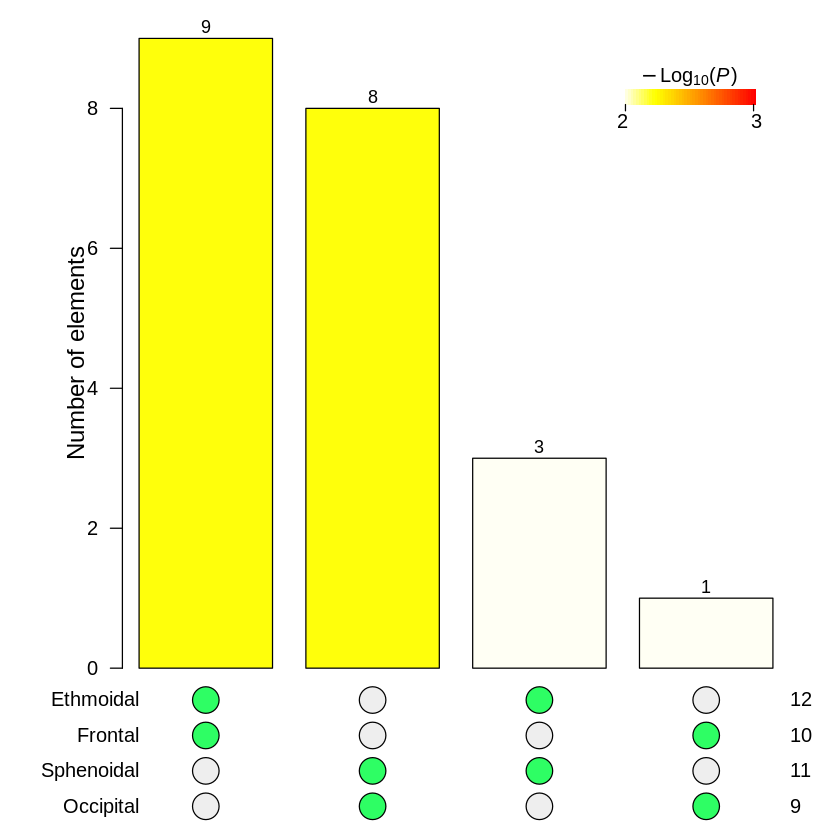

In [128]:
# check overloap between node-based modules
res<-supertest(clean_mod,n=vcount(g), degree = c(2:length(clean_mod)))
pcorrect<-(0.05/(bell(length(clean_mod))-length(clean_mod)))

plot(res, sort.by = 'p-value', degree = c(2:length(clean_mod)),
    Layout='landscape', keep.empty.intersections=FALSE,min.intersection.size=1,
    minMinusLog10PValue=abs(log10(pcorrect)))

In [131]:
# details
facial<-sort(unique(c(clean_mod$Ethmoidal, clean_mod$Frontal)))
cranial<-sort(unique(c(clean_mod$Sphenoidal, clean_mod$Occipital)))
print(facial)

 [1] "Ethmoidal"          "Frontal"            "Lacrimal.Left"     
 [4] "Lacrimal.Right"     "Maxilla.Left"       "Maxilla.Right"     
 [7] "Nasal.Concha.Left"  "Nasal.Concha.Right" "Nasal.Left"        
[10] "Nasal.Right"        "Palatine.Left"      "Palatine.Right"    
[13] "Vomer"             


In [133]:
print(cranial)

 [1] "Frontal"         "Occipital"       "Palatine.Left"   "Palatine.Right" 
 [5] "Parietal.Left"   "Parietal.Right"  "Sphenoidal"      "Temporal.Left"  
 [9] "Temporal.Right"  "Vomer"           "Zygomatic.Left"  "Zygomatic.Right"


In [134]:
print(intersect(facial, cranial))

[1] "Frontal"        "Palatine.Left"  "Palatine.Right" "Vomer"         


In [154]:
# testing
vids<-c(1:vcount(g))[is.element(V(g)$name, facial)]
in.links<-degree(induced_subgraph(g, vids))
out.links<-degree(g, vids)-in.links
res<-wilcox.test(in.links, out.links, alternative="greater")
print("Facial module")

Warning message in wilcox.test.default(in.links, out.links, alternative = "greater"):
“cannot compute exact p-value with ties”

[1] "Facial module"


In [155]:
print(res)


	Wilcoxon rank sum test with continuity correction

data:  in.links and out.links
W = 161.5, p-value = 3.124e-05
alternative hypothesis: true location shift is greater than 0



Occipital 
        5

# Our data

In [228]:
library(igraph)
library(numbers)
library(SuperExactTest)

In [14]:
g<-read_graph("a.lgl", format='lgl')
g

IGRAPH 7b5be03 UN-- 229 658 -- 
+ attr: name (v/c)
+ edges from 7b5be03 (vertex names):
 [1] 左嗅觉细胞（嗅觉粘膜）--左嗅脑                
 [2] 右嗅觉细胞（嗅觉粘膜）--右嗅脑                
 [3] 左嗅脑                --左大脑皮层听觉区      
 [4] 右嗅脑                --右大脑皮层听觉区      
 [5] 左侧左半视网膜        --右丘脑外侧膝状体      
 [6] 左侧右半视网膜        --左丘脑外侧膝状体      
 [7] 右丘脑外侧膝状体      --右侧左半视网膜        
 [8] 左丘脑外侧膝状体      --右侧右半视网膜        
+ ... omitted several edges

In [351]:
# find node-based modules
mod<-list()
for (i in 1:vcount(g)){
    m<-cluster_spinglass(g, vertex=i, gamma = 0.1)
    mod[[i]]<-V(g)$name[m$community]
}
names(mod)<-V(g)$name

# filter out redundancies
clean_mod<-mod
for (i in 1:(length(clean_mod)-1)){
    j<-i+1
    while (j<=length(clean_mod)){
        if (setequal(clean_mod[[i]], clean_mod[[j]])==TRUE){clean_mod[[j]]<-NA} # if i == j
        if (all(is.element(clean_mod[[i]], clean_mod[[j]]))==TRUE) {clean_mod[[i]]<-NA}  # if i belongs j
        if (all(is.element(clean_mod[[j]], clean_mod[[i]]))==TRUE) {clean_mod[[j]]<-NA} # if j belongs i
        j<-j+1
    }
}

clean_mod<-clean_mod[!is.na(clean_mod)]
print(length(clean_mod))
print(clean_mod)

[1] 15
$`左嗅觉细胞（嗅觉粘膜）`
[1] "左嗅觉细胞（嗅觉粘膜）" "左嗅脑"                

$`右嗅觉细胞（嗅觉粘膜）`
[1] "右嗅觉细胞（嗅觉粘膜）" "右嗅脑"                

$左侧左半视网膜
[1] "左侧左半视网膜"   "右丘脑外侧膝状体" "右侧左半视网膜"   "右上丘"          

$左侧右半视网膜
[1] "左侧右半视网膜"   "左丘脑外侧膝状体" "右侧右半视网膜"   "左上丘"          

$左面神经核
 [1] "左面神经核"     "左颈阔肌"       "左耳后肌"       "左笑肌"        
 [5] "左颧大肌"       "左颧小肌"       "左额肌"         "左颞顶肌"      
 [9] "左耳前肌"       "左耳下肌"       "左眼轮匝肌"     "左降眉肌"      
[13] "左皱眉肌"       "左提上唇鼻翼肌" "左降眉间肌"     "左提上唇肌"    
[17] "左鼻肌"         "左降鼻中隔肌"   "左提口角肌"     "左口轮匝肌"    
[21] "左降下唇肌"     "左降口角肌"    

$右面神经核
 [1] "右面神经核"     "右颈阔肌"       "右耳后肌"       "右笑肌"        
 [5] "右颧大肌"       "右颧小肌"       "右额肌"         "右颞顶肌"      
 [9] "右耳前肌"       "右耳下肌"       "右眼轮匝肌"     "右降眉肌"      
[13] "右皱眉肌"       "右提上唇鼻翼肌" "右降眉间肌"     "右提上唇肌"    
[17] "右鼻肌"         "右降鼻中隔肌"   "右提口角肌"     "右口轮匝肌"    
[21] "右降下唇肌"     "右降口角肌"    

$左疑核
 [1] "左疑核"       "左茎突咽肌"   "左咽中缩肌"   "左腭咽肌"     "左咽鼓管咽肌"
 [6] "左甲杓肌"     "左环杓肌"     "杓横肌"       "杓斜肌"       "左环杓后肌"  


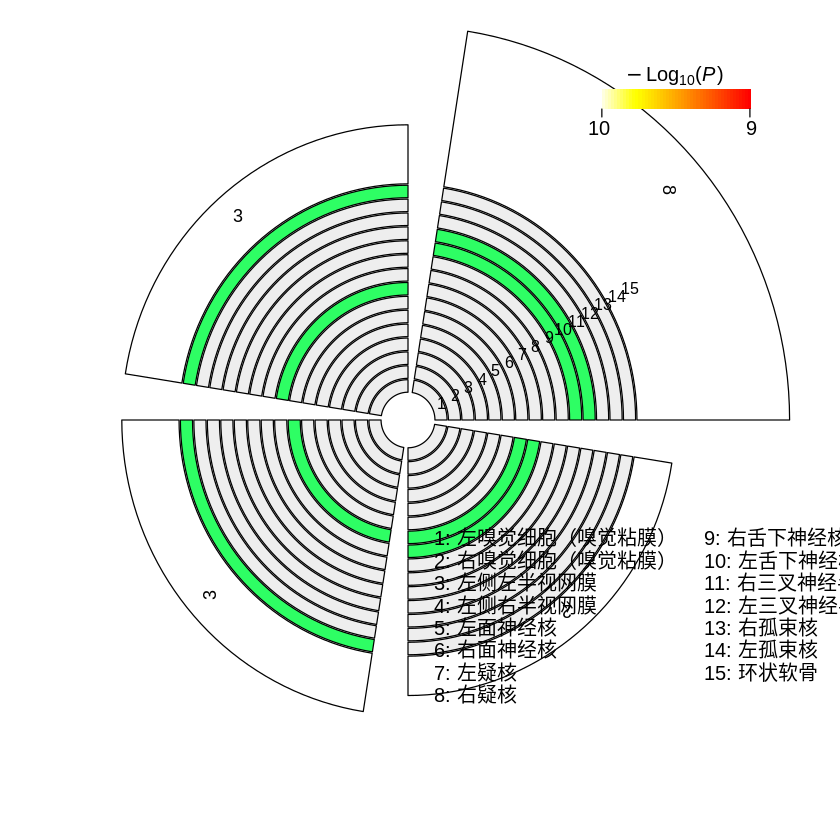

In [352]:
# check overloap between node-based modules
#res<-supertest(clean_mod,n=vcount(g), degree = c(2:length(clean_mod)))
max_degree = 2
res<-supertest(clean_mod,n=vcount(g), degree = 2)
pcorrect<-(0.05/(bell(length(clean_mod))-length(clean_mod)))

plot(res, sort.by = 'p-value', degree = 2,
    Layout='circular', keep.empty.intersections=FALSE, min.intersection.size=1,
    minMinusLog10PValue=abs(log10(pcorrect)))

In [346]:
sort(unique(c(clean_mod$右舌下神经核, clean_mod$左舌下神经核)))

[1] "右腭舌肌"     "右舌下神经核" "右舌骨舌肌"   "右茎突舌肌"   "左腭舌肌"    
[6] "左舌下神经核" "左舌骨舌肌"   "左茎突舌肌"

In [347]:
clean_mod

$`左嗅觉细胞（嗅觉粘膜）`
[1] "左嗅觉细胞（嗅觉粘膜）" "左嗅脑"                

$`右嗅觉细胞（嗅觉粘膜）`
[1] "右嗅觉细胞（嗅觉粘膜）" "右嗅脑"                

$左侧左半视网膜
[1] "左侧左半视网膜"   "右丘脑外侧膝状体" "右侧左半视网膜"   "右上丘"          

$左侧右半视网膜
[1] "左侧右半视网膜"   "左丘脑外侧膝状体" "右侧右半视网膜"   "左上丘"          

$左面神经核
 [1] "左面神经核"     "左颈阔肌"       "左耳后肌"       "左笑肌"        
 [5] "左颧大肌"       "左颧小肌"       "左额肌"         "左颞顶肌"      
 [9] "左耳前肌"       "左耳下肌"       "左眼轮匝肌"     "左降眉肌"      
[13] "左皱眉肌"       "左提上唇鼻翼肌" "左降眉间肌"     "左提上唇肌"    
[17] "左鼻肌"         "左降鼻中隔肌"   "左提口角肌"     "左口轮匝肌"    
[21] "左降下唇肌"     "左降口角肌"    

$右面神经核
 [1] "右面神经核"     "右颈阔肌"       "右耳后肌"       "右笑肌"        
 [5] "右颧大肌"       "右颧小肌"       "右额肌"         "右颞顶肌"      
 [9] "右耳前肌"       "右耳下肌"       "右眼轮匝肌"     "右降眉肌"      
[13] "右皱眉肌"       "右提上唇鼻翼肌" "右降眉间肌"     "右提上唇肌"    
[17] "右鼻肌"         "右降鼻中隔肌"   "右提口角肌"     "右口轮匝肌"    
[21] "右降下唇肌"     "右降口角肌"    

$左疑核
 [1] "左疑核"       "左茎突咽肌"   "左咽中缩肌"   "左腭咽肌"     "左咽鼓管咽肌"
 [6] "左甲杓肌"     "左环杓肌"     "杓横肌"       "杓斜肌"       "左环杓后肌"  
[11] "左副神经核"   "左杓状软骨"  

$右疑核
 [1] "右疑核"       "右茎突咽肌"   "右咽中缩肌"   "右腭咽肌"     "右咽鼓管咽肌"
 [6] "右甲杓肌"     "右环杓肌"     "杓横肌"       "杓斜肌"       "右环杓后肌"  
[11] "右副神经核"   "右杓状软骨"  

$右舌下神经核
[1] "右舌下神经核" "右舌骨舌肌"   "右茎突舌肌"   "右腭舌肌"    

$左舌下神经核
[1] "左舌下神经核" "左舌骨舌肌"   "左茎突舌肌"   "左腭舌肌"    

$右三叉神经半月神经节
 [1] "右三叉神经半月神经节"   "左大脑皮层中央后回底部" "左三叉神经中脑核"      
 [4] "右三叉神经中脑核"       "左三叉神经脑桥核"       "右三叉神经脑桥核"      
 [7] "左三叉神经脊束核"       "右三叉神经脊束核"       "右锤骨"                
[10] "右砧骨"                 "右镫骨"                 "右大脑皮层中央后回底部"

$左三叉神经半月神经节
 [1] "左三叉神经半月神经节"   "右大脑皮层中央后回底部" "左三叉神经中脑核"      
 [4] "右三叉神经中脑核"       "左三叉神经脑桥核"       "右三叉神经脑桥核"      
 [7] "左三叉神经脊束核"       "右三叉神经脊束核"       "左锤骨"                
[10] "左砧骨"                 "左镫骨"                 "左大脑皮层中央后回底部"

$右孤束核
[1] "右孤束核"         "左丘脑腹后内侧核" "右面神经膝"       "右上神经节"      
[5] "右舌、会厌乳头"  

$左孤束核
[1] "左孤束核"         "右丘脑腹后内侧核" "左面神经膝"       "左上神经节"      
[5] "左舌、会厌乳头"  

$环状软骨
[1] "环状软骨"   "左杓状软骨" "右杓状软骨" "左环杓肌"   "右环杓肌"  
[6] "左环杓后肌" "右环杓后肌"

In [158]:
res[sort(res$P.value, decreasing = TRUE)[1]]

$x
$x$`左嗅觉细胞（嗅觉粘膜）`
 [1] "左嗅觉细胞（嗅觉粘膜）" "左嗅脑"                 "左大脑皮层听觉区"      
 [4] "右涡神经核"             "右双极细胞"             "左涡神经核"            
 [7] "右大脑皮层听觉区"       "左双极细胞"             "右嗅脑"                
[10] "右嗅觉细胞（嗅觉粘膜）" "右大脑皮层味觉区"       "右大脑皮层视觉区"      
[13] "右脑膜"                 "右大脑皮层中央后回底部" "右大脑皮层中央前回底部"
[16] "左脑膜"                 "左大脑皮层味觉区"       "左大脑皮层视觉区"      
[19] "左大脑皮层中央后回底部" "左大脑皮层中央前回底部" "右展神经核"            
[22] "左展神经核"             "右滑车神经核"           "左滑车神经核"          
[25] "右副神经脊髓根"         "左副神经脊髓根"         "右三叉神经脊束核"      
[28] "左三叉神经脊束核"       "右三叉神经脑桥核"       "左三叉神经脑桥核"      
[31] "右三叉神经半月神经节"   "右三叉神经中脑核"       "左三叉神经半月神经节"  
[34] "左三叉神经中脑核"       "右三叉神经运动核"       "左三叉神经运动核"      
[37] "右眼上斜肌"             "左眼上斜肌"             "左眼外直肌"            
[40] "右眼外直肌"             "右迷走神经背核"         "左迷走神经背核"        
[43] "左上丘"                 "左丘脑腹后内侧核"       "右上丘"                
[46] "右丘脑腹后内侧核"       "左孤束核"               "左上神经节"            
[49] "左舌、会厌乳头"         "左面神经膝"             "右丘脑外侧膝状体"      
[52] "右侧左半视网膜"         "左侧左半视网膜"         "右孤束核"              
[55] "右上神经节"             "右舌、会厌乳头"         "右面神经膝"            
[58] "左丘脑外侧膝状体"       "右侧右半视网膜"         "左侧右半视网膜"        
[61] "左二腹肌前腹"           "右二腹肌前腹"           "左镫骨"                
[64] "左砧骨"                 "左锤骨"                 "左镫骨肌"              
[67] "右镫骨"                 "右砧骨"                 "右锤骨"                
[70] "右镫骨肌"               "梨骨"                  

$x$左大脑皮层中央前回底部
 [1] "左大脑皮层中央前回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层中央后回底部" "左大脑皮层味觉区"       "左滑车神经核"          
 [7] "右滑车神经核"           "左展神经核"             "右展神经核"            
[10] "左疑核"                 "右疑核"                 "右迷走神经背核"        
[13] "右舌下神经核"           "左副神经核"             "右副神经核"            
[16] "左副神经脊髓根"         "右副神经脊髓根"         "右C1、C2"              
[19] "左脑膜"                 "右大脑皮层中央前回底部" "杓斜肌"                
[22] "杓横肌"                 "右环杓后肌"             "右杓状软骨"            
[25] "右环杓肌"               "右甲杓肌"               "右咽中缩肌"            
[28] "左咽中缩肌"             "左环杓后肌"             "环状软骨"              
[31] "左杓状软骨"             "左环杓肌"               "左甲杓肌"              
[34] "右咽下缩肌"             "左咽下缩肌"             "右环甲肌"              
[37] "甲状软骨"               "左环甲肌"               "右咽鼓管咽肌"          
[40] "右腭咽肌"               "右茎突咽肌"             "左咽鼓管咽肌"          
[43] "左腭咽肌"               "左茎突咽肌"             "右甲状舌骨肌"          
[46] "右胸骨甲状肌"           "左迷走神经背核"         "右腭帆提肌"            
[49] "左腭帆提肌"             "右眼外直肌"             "左眼外直肌"            
[52] "左眼上斜肌"             "右眼上斜肌"             "右腭舌肌"              
[55] "左丘脑腹后内侧核"       "左嗅脑"                 "左嗅觉细胞（嗅觉粘膜）"
[58] "左上丘"                 "左丘脑外侧膝状体"       "右侧右半视网膜"        
[61] "左侧右半视网膜"         "右孤束核"               "右上神经节"            
[64] "右舌、会厌乳头"         "右面神经膝"             "左甲状舌骨肌"          
[67] "左C1、C2"               "左胸骨甲状肌"           "左肩胛舌骨肌下段"      
[70] "左肩胛舌骨肌上段"       "左肩胛骨"               "左斜方肌"              
[73] "左锁骨"                 "胸骨"                   "左胸锁乳突肌"          
[76] "左胸骨舌骨肌"           "右胸骨舌骨肌"           "舌骨"                  
[79] "右肩胛舌骨肌上段"       "右肩胛舌骨肌下段"       "右舌骨舌肌"            
[82] "右茎突舌肌"             "右颏舌肌"               "右颏舌骨肌"            
[85] "左颏舌骨肌"             "右胸锁乳突肌"           "右锁骨"                
[88] "右肩胛骨"               "右斜方肌"               "椎骨"                  

$x$左大脑皮层中央后回底部
 [1] "左大脑皮层中央后回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层中央前回底部" "左大脑皮层味觉区"       "左三叉神经中脑核"      
 [7] "右三叉神经中脑核"       "左三叉神经脑桥核"       "右三叉神经脑桥核"      
[10] "左三叉神经脊束核"       "右三叉神经脊束核"       "右三叉神经半月神经节"  
[13] "左脑膜"                 "右大脑皮层中央后回底部" "左三叉神经半月神经节"  
[16] "右脑膜"                 "额骨"                   "左泪骨"                
[19] "筛骨"                   "右泪骨"                 "左鼻骨"                
[22] "右鼻骨"                 "左上颌骨"               "右上颌骨"              
[25] "梨骨"                   "左腭骨"                 "右腭骨"                
[28] "左颧骨"            

In [312]:
pcorrect<-(0.05/(bell(length(clean_mod))-length(clean_mod)))
minMinusLog10PValue=abs(log10(pcorrect))

for (i in 1:length(clean_mod)-1){
    res<-supertest(clean_mod, n=vcount(g), degree = 2)
    
    na <- names(sort(res$P.value, decreasing = TRUE)[1])  # the name of the set with the max p value
    print(res$P.value[na])
    
    # merge
    if (res$P.value[na] > 1e-5){
        idx<-c(unlist(gregexpr("1", na)))
        clean_mod[[idx[[1]]]]<-sort(unique(c(unlist(clean_mod[idx]))))
        clean_mod[[idx[[2]]]] <- NA
        clean_mod<-clean_mod[!is.na(clean_mod)]
    }
}

000000000000011 
              1 
00000000000011 
             1 
0000000000011 
            1 
000000000101 
           1 
00000000101 
          1 
0000000110 
         1 
000001001 
        1 
00001001 
       1 
0001001 
      1 
001001 
     1 
01001 
    1 
1001 
   1 
      110 
0.9460998 
       11 
0.9097685 


ERROR: Error in incIntersect(x, degree): Input x should have at least two entries

